# Import Necessary Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load and Preprocess the Dataset

In [3]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
!kaggle datasets download -d animatronbot/mnist-digit-recognizer

Dataset URL: https://www.kaggle.com/datasets/animatronbot/mnist-digit-recognizer
License(s): CC0-1.0
 76% 7.00M/9.16M [00:01<00:00, 8.08MB/s]
100% 9.16M/9.16M [00:01<00:00, 6.13MB/s]


In [5]:
!unzip /content/mnist-digit-recognizer.zip

Archive:  /content/mnist-digit-recognizer.zip
  inflating: train.csv               


In [9]:
# Load the train.csv dataset
train_data = pd.read_csv('/content/train.csv')  # Update with correct path if needed

# Separate features (X) and labels (y)
X = train_data.drop('label', axis=1)
y = train_data['label']

# Normalize pixel values to the range 0-1
X = X / 255.0

# Reshape the images into 28x28 pixel format with 1 color channel (grayscale)
X = X.values.reshape(-1, 28, 28, 1)

# Split the Data for Training and Testing

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN Model

In [11]:
# Create a CNN model
model = models.Sequential()

# Add convolutional and pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes (digits 0-9)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Train the Model

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8413 - loss: 0.5101 - val_accuracy: 0.9801 - val_loss: 0.0723
Epoch 2/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9767 - loss: 0.0690 - val_accuracy: 0.9884 - val_loss: 0.0479
Epoch 3/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9864 - loss: 0.0443 - val_accuracy: 0.9824 - val_loss: 0.0533
Epoch 4/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9883 - loss: 0.0339 - val_accuracy: 0.9833 - val_loss: 0.0470
Epoch 5/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9909 - loss: 0.0279 - val_accuracy: 0.9857 - val_loss: 0.0426
Epoch 6/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9930 - loss: 0.0215 - val_accuracy: 0.9875 - val_loss: 0.0376
Epoch 7/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9946 - loss: 0.0181 - val_accuracy: 0.9842 - val_loss: 0.0655
Epoch 8/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9956 - loss: 0.0134 - val_accuracy: 0.

# Evaluate and Visualize Predictions

In [13]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)  # Get the predicted digit labels

263/263 - 1s - 5ms/step - accuracy: 0.9861 - loss: 0.0516
Test accuracy: 0.9860714077949524
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# Visualize the Predictions

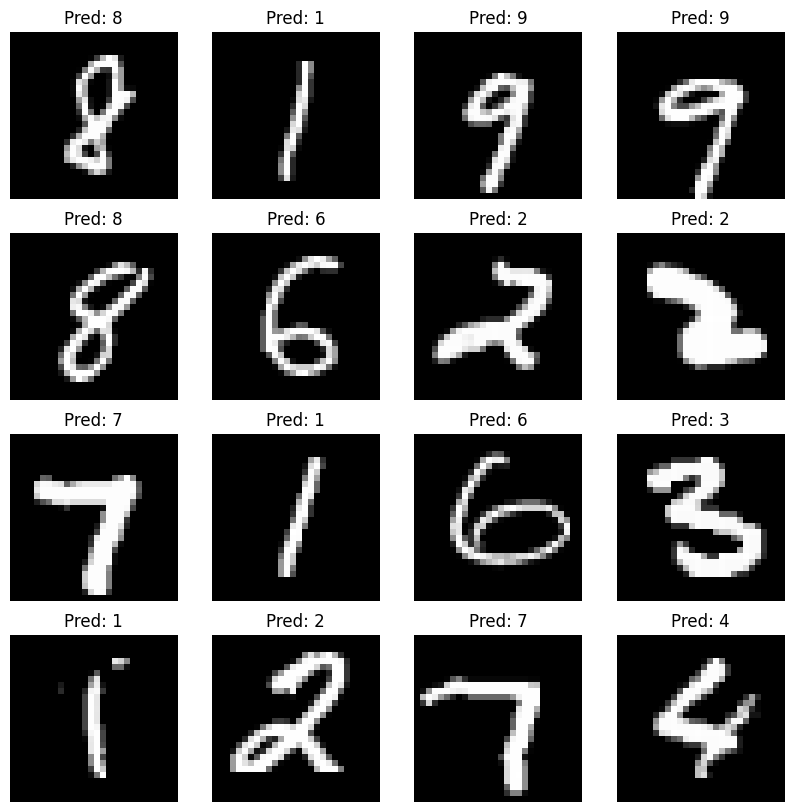

In [16]:
# Function to plot images with their predicted labels
def plot_images(images, labels, predictions=None):
    plt.figure(figsize=(10,10))
    for i in range(16):  # Show 16 images
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        title = f"Pred: {predictions[i]}" if predictions is not None else ""
        plt.title(title)
        plt.axis('off')
    plt.show()

# Visualize the first 16 test images and their predicted labels
plot_images(X_test[:16], y_test[:16], predicted_labels[:16])